In [10]:
from Robinhood import Robinhood, endpoints
import robin_stocks as r
import inspect
import math
import matplotlib.pyplot as plt
import datetime as dt

In [8]:
my_trader = Robinhood()
my_trader = r
my_trader.login(username="anshul.tibrewal2203@gmail.com", password="Icangeta45!")
bs = "bs"

In [45]:
item

{'begins_at': '2020-05-08T00:00:00Z',
 'open_price': '0.010000',
 'close_price': '7.100000',
 'high_price': '7.600000',
 'low_price': '0.010000',
 'volume': 0,
 'session': 'reg',
 'interpolated': False}

Found Additional pages.
Loading page 2 ...


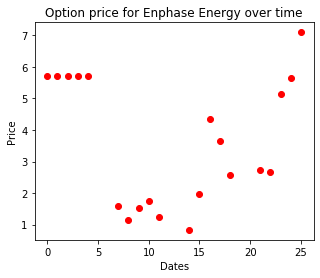

In [44]:
#!!! fill out the specific option information
symbol = 'ENPH'
expirationDate = '2020-06-19'
strike = 55
optionType = 'call'
span = 'year' #available options are day,week,year, and 5year
#!!!
days = 20
historicalData = r.get_option_historicals(symbol,expirationDate,strike,optionType,span)

dates = []
closingPrices = []
openPrices = []

for item in historicalData['data_points']:
#     print(item)
    dates.append(dt.datetime.strptime(item['begins_at'],'%Y-%m-%dT%H:%M:%SZ'))
    closingPrices.append(float(item['close_price']))
    openPrices.append(float(item['open_price']))

# print(openPrices)
#!!! I made it so it only got the last 30 days but you could delete these lines to get full year.
dates = dates[-days:]
closingPrices = closingPrices[-days:]
openPrices = openPrices[-days:]
#
start_date = dates[0]


# change the dates into a format that matplotlib can recognize.
# x = [dt.datetime.strptime(d,'%Y-%m-%dT%H:%M:%SZ') for d in dates]
x = []
for d in dates:
    seconds = (d - start_date).total_seconds()/86400
    x.append(seconds)
    


plt.figure(figsize=(5,4))
# plots the data.
plt.plot(x, closingPrices, 'ro')
# plt.plot(x, openPrices, 'bo')
plt.title("Option price for "+r.get_name_by_symbol(symbol)+" over time")
plt.xlabel("Dates")
plt.ylabel("Price")
plt.show()

In [46]:
date = "2020-05-15"
tickr = "ENPH"
calls = my_trader.get_options(tickr, date, "call")
puts = my_trader.get_options(tickr, date, "put")

AttributeError: module 'robin_stocks' has no attribute 'get_options'

In [21]:
idx = 12
call = calls[idx]
print(call, "\n")
put = puts[idx]
print(put, "\n")

{'chain_id': '53ac412e-d84f-4cd8-a239-fbbe93354dbd', 'chain_symbol': 'ENPH', 'created_at': '2020-02-11T01:10:11.123194Z', 'expiration_date': '2020-05-15', 'id': '4179a3da-7426-4be9-9614-fc0ffd803b68', 'issue_date': '2012-04-16', 'min_ticks': {'above_tick': '0.10', 'below_tick': '0.05', 'cutoff_price': '3.00'}, 'rhs_tradability': 'untradable', 'state': 'active', 'strike_price': '55.0000', 'tradability': 'tradable', 'type': 'call', 'updated_at': '2020-02-11T01:10:11.123204Z', 'url': 'https://api.robinhood.com/options/instruments/4179a3da-7426-4be9-9614-fc0ffd803b68/'} 

{'chain_id': '53ac412e-d84f-4cd8-a239-fbbe93354dbd', 'chain_symbol': 'ENPH', 'created_at': '2020-02-11T01:10:11.123273Z', 'expiration_date': '2020-05-15', 'id': 'f8a54abd-2916-43bb-9260-780d51e9d8b7', 'issue_date': '2012-04-16', 'min_ticks': {'above_tick': '0.10', 'below_tick': '0.05', 'cutoff_price': '3.00'}, 'rhs_tradability': 'untradable', 'state': 'active', 'strike_price': '55.0000', 'tradability': 'tradable', 'type':

In [22]:
call_data = my_trader.get_option_market_data(call["id"])
put_data = my_trader.get_option_market_data(put["id"])                                            
print(call_data, "\n\n")
print(put_data)


{'adjusted_mark_price': '3.700000', 'ask_price': '3.800000', 'ask_size': 60, 'bid_price': '3.600000', 'bid_size': 11, 'break_even_price': '58.700000', 'high_price': '4.100000', 'instrument': 'https://api.robinhood.com/options/instruments/4179a3da-7426-4be9-9614-fc0ffd803b68/', 'last_trade_price': '3.700000', 'last_trade_size': 2, 'low_price': '2.150000', 'mark_price': '3.700000', 'open_interest': 1669, 'previous_close_date': '2020-05-07', 'previous_close_price': '2.280000', 'volume': 432, 'chance_of_profit_long': '0.388735', 'chance_of_profit_short': '0.611265', 'delta': '0.667985', 'gamma': '0.059409', 'implied_volatility': '0.770342', 'rho': '0.006628', 'theta': '-0.158596', 'vega': '0.028797', 'high_fill_rate_buy_price': '3.760000', 'high_fill_rate_sell_price': '3.610000', 'low_fill_rate_buy_price': '3.680000', 'low_fill_rate_sell_price': '3.700000'} 


{'adjusted_mark_price': '1.450000', 'ask_price': '1.500000', 'ask_size': 11, 'bid_price': '1.400000', 'bid_size': 10, 'break_even_p

In [211]:
C = float(call_data["adjusted_mark_price"])
S = 
T = 11/365
bren_subra_approx(T, C, S)

0.6634179548215633

In [13]:
# Calculate IV or sigma various methods

# Use Brenes and Subrahmanyam approximation
def bren_subra_approx (time, option_price, stock_price):
    iv = (math.sqrt(2*math.pi/time))*(option_price/stock_price)
    return iv

In [14]:
my_trader.get_historical_quotes(tickr, "day", "week")
# my_trader.quote_data("TSLA")

{'results': [{'quote': 'https://api.robinhood.com/quotes/69cbc174-ead1-49a9-9c72-a8f015de474f/',
   'symbol': 'ENPH',
   'interval': 'day',
   'span': 'week',
   'bounds': 'regular',
   'instrument': 'https://api.robinhood.com/instruments/69cbc174-ead1-49a9-9c72-a8f015de474f/',
   'historicals': [{'begins_at': '2020-05-04T00:00:00Z',
     'open_price': '41.750000',
     'close_price': '43.980000',
     'high_price': '44.150000',
     'low_price': '41.570000',
     'volume': 3294538,
     'session': 'reg',
     'interpolated': False},
    {'begins_at': '2020-05-05T00:00:00Z',
     'open_price': '46.330000',
     'close_price': '44.370000',
     'high_price': '46.500000',
     'low_price': '43.790000',
     'volume': 5430121,
     'session': 'reg',
     'interpolated': False},
    {'begins_at': '2020-05-06T00:00:00Z',
     'open_price': '47.000000',
     'close_price': '52.680000',
     'high_price': '53.530000',
     'low_price': '46.500000',
     'volume': 11216009,
     'session': 're

In [76]:
tickr = "AMZN"
# my_trader.get_news(tickr)


In [27]:
# my_trader.positions()
stock_instrument = my_trader.instruments("GEVO")[0]
# stock_instrument

In [42]:
url = str("https://api.robinhood.com/options/instruments/4179a3da-7426-4be9-9614-fc0ffd803b68/")
buy_order = my_trader.place_market_buy_order(url, symbol='ENPH', time_in_force ='GFD', quantity=1)

{'account': 'https://api.robinhood.com/accounts/5XD84262/', 'instrument': 'https://api.robinhood.com/options/instruments/4179a3da-7426-4be9-9614-fc0ffd803b68/', 'symbol': 'ENPH', 'type': 'market', 'time_in_force': 'gfd', 'trigger': 'immediate', 'price': 57.49, 'quantity': 1, 'side': 'buy'}
400 Client Error: Bad Request for url: https://api.robinhood.com/orders/
